In [16]:
%config IPCompleter.greedy=True

In [17]:
import os
import sys
#from stocker import Stocker
import io
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import datetime
from matplotlib import style
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [18]:
pwd 

'/Users/josh/Downloads'

In [19]:
cd desktop

[Errno 2] No such file or directory: 'desktop'
/Users/josh/Downloads


In [26]:
cd CSV

/Users/josh/Desktop/CSV


In [28]:
Codx_df = pd.read_csv('Codx.csv')
Ino_df = pd.read_csv('Ino.csv')
Mrna_df = pd.read_csv('Mrna.csv')
Vir_df = pd.read_csv('Vir.csv')
Vxrt_df = pd.read_csv('Vxrt.csv')

In [29]:
style.use('classic')

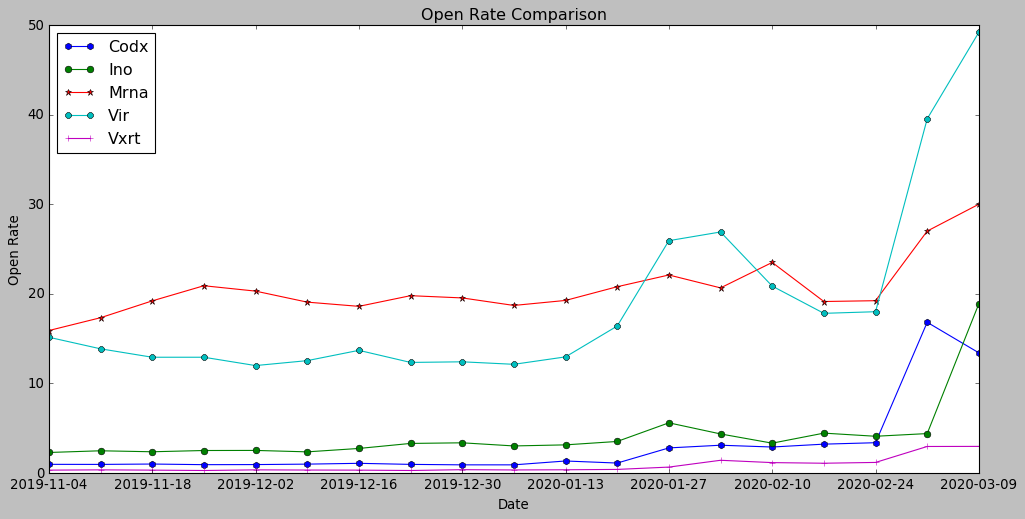

In [30]:

ax = plt.gca()
#plt.legend(loc='upper left', shadow=True, fontsize='x-large')
Codx_df.plot(kind='line',x='Date',y='Open',ax=ax,figsize = (15,7),marker='h',label='Codx',x_compat=True)
Ino_df.plot(kind='line',x='Date',y='Open',ax=ax,figsize = (15,7),marker='o',label='Ino',x_compat=True)
Mrna_df.plot(kind='line',x='Date',y='Open',ax=ax,figsize = (15,7),marker='*',label='Mrna',x_compat=True)
Vir_df.plot(kind='line',x='Date',y='Open',ax=ax,figsize = (15,7),marker='8',label='Vir',x_compat=True)
Vxrt_df.plot(kind='line',x='Date',y='Open',ax=ax,figsize = (15,7),marker='+',label='Vxrt',x_compat=True)


plt.title("Open Rate Comparison")
plt.xlabel("Date")
plt.ylabel("Open Rate");

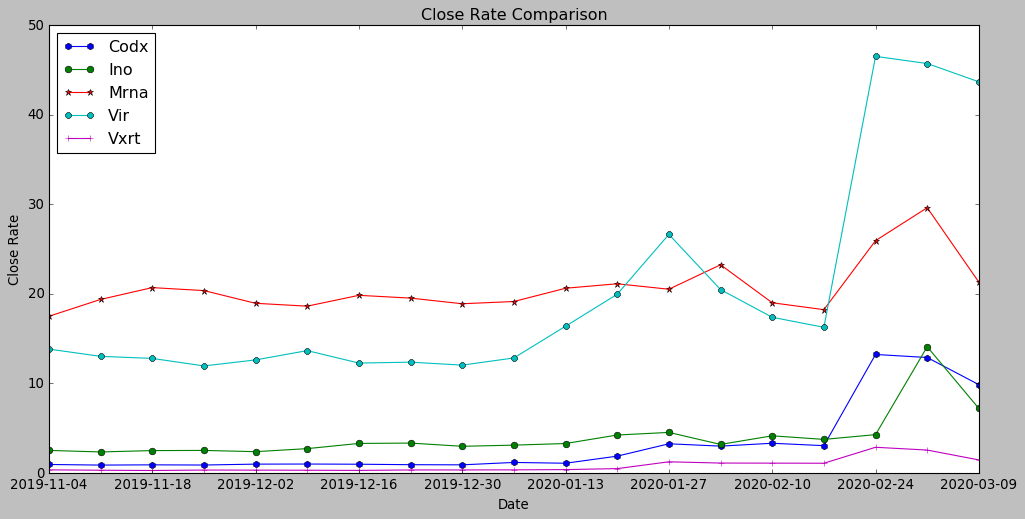

In [31]:

ax = plt.gca()

Codx_df.plot(kind='line',x='Date',y='Close',ax=ax,figsize = (15,7),marker='h',label='Codx',x_compat=True)
Ino_df.plot(kind='line',x='Date',y='Close',ax=ax,figsize = (15,7),marker='o',label='Ino',x_compat=True)
Mrna_df.plot(kind='line',x='Date',y='Close',ax=ax,figsize = (15,7),marker='*',label='Mrna',x_compat=True)
Vir_df.plot(kind='line',x='Date',y='Close',ax=ax,figsize = (15,7),marker='8',label='Vir',x_compat=True)
Vxrt_df.plot(kind='line',x='Date',y='Close',ax=ax,figsize = (15,7),marker='+',label='Vxrt',x_compat=True)


plt.title("Close Rate Comparison")
plt.xlabel("Date")
plt.ylabel("Close Rate");

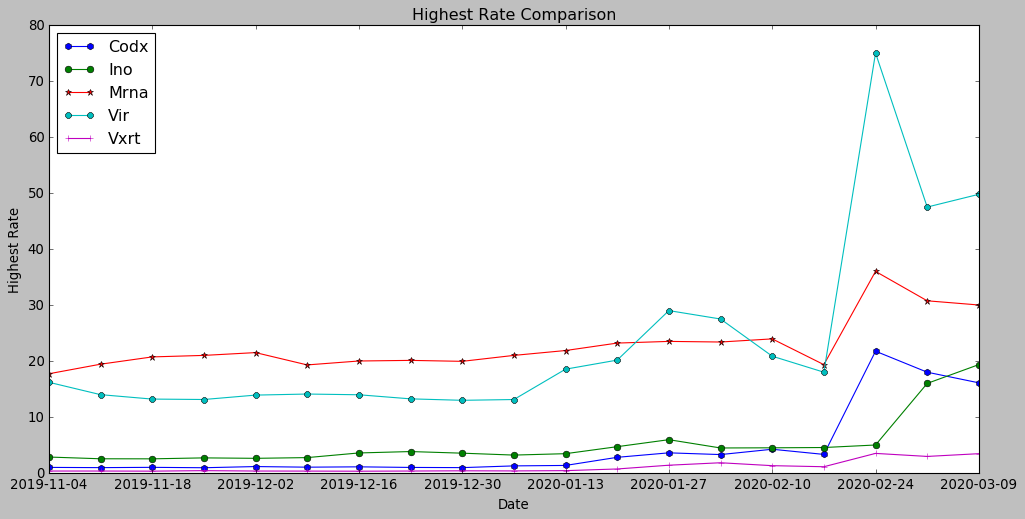

In [32]:

ax = plt.gca()


Codx_df.plot(kind='line',x='Date',y='High',ax=ax,figsize = (15,7),marker='h',label='Codx',x_compat=True)
Ino_df.plot(kind='line',x='Date',y='High',ax=ax,figsize = (15,7),marker='o',label='Ino',x_compat=True)
Mrna_df.plot(kind='line',x='Date',y='High',ax=ax,figsize = (15,7),marker='*',label='Mrna',x_compat=True)
Vir_df.plot(kind='line',x='Date',y='High',ax=ax,figsize = (15,7),marker='8',label='Vir',x_compat=True)
Vxrt_df.plot(kind='line',x='Date',y='High',ax=ax,figsize = (15,7),marker='+',label='Vxrt',x_compat=True)


plt.title("Highest Rate Comparison")
plt.xlabel("Date")
plt.ylabel("Highest Rate");

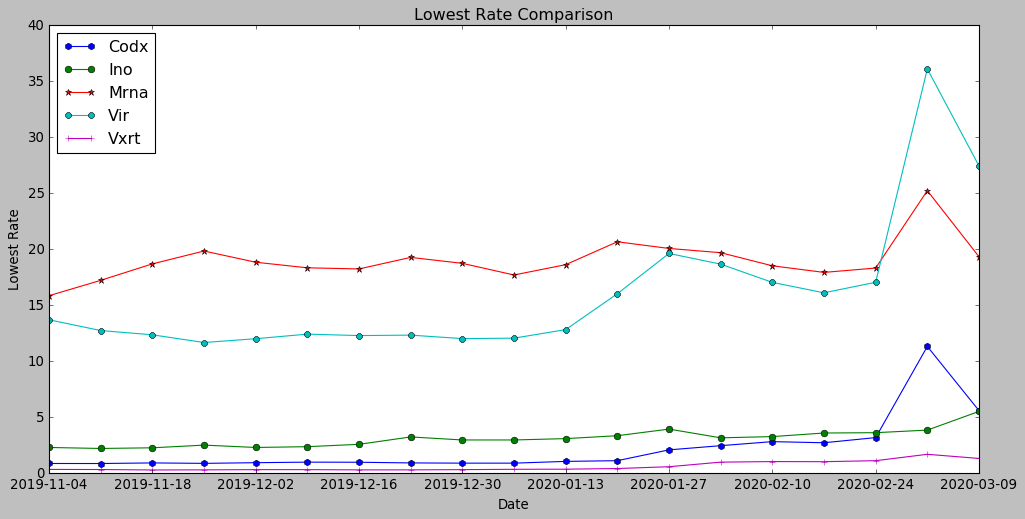

In [33]:

ax = plt.gca()

Codx_df.plot(kind='line',x='Date',y='Low',ax=ax,figsize = (15,7),marker='h',label='Codx',x_compat=True)
Ino_df.plot(kind='line',x='Date',y='Low',ax=ax,figsize = (15,7),marker='o',label='Ino',x_compat=True)
Mrna_df.plot(kind='line',x='Date',y='Low',ax=ax,figsize = (15,7),marker='*',label='Mrna',x_compat=True)
Vir_df.plot(kind='line',x='Date',y='Low',ax=ax,figsize = (15,7),marker='8',label='Vir',x_compat=True)
Vxrt_df.plot(kind='line',x='Date',y='Low',ax=ax,figsize = (15,7),marker='+',label='Vxrt',x_compat=True)


plt.title("Lowest Rate Comparison")
plt.xlabel("Date")
plt.ylabel("Lowest Rate");

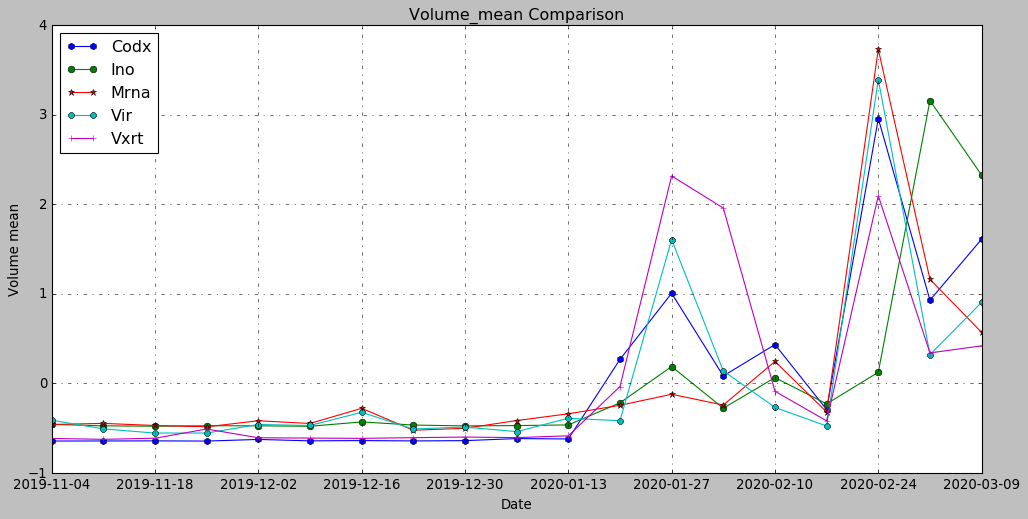

In [34]:
ax = plt.gca()
Codx_df['Volume_mean']=(Codx_df['Volume']-Codx_df['Volume'].mean())/Codx_df['Volume'].std()
Ino_df['Volume_mean']=(Ino_df['Volume']-Ino_df['Volume'].mean())/Ino_df['Volume'].std()
Mrna_df['Volume_mean']=(Mrna_df['Volume']-Mrna_df['Volume'].mean())/Mrna_df['Volume'].std()
Vir_df['Volume_mean']=(Vir_df['Volume']-Vir_df['Volume'].mean())/Vir_df['Volume'].std()
Vxrt_df['Volume_mean']=(Vxrt_df['Volume']-Vxrt_df['Volume'].mean())/Vxrt_df['Volume'].std()
Codx_df.plot(kind='line',x='Date',y='Volume_mean',ax=ax,figsize = (15,7),marker='h',label='Codx',x_compat=True)
Ino_df.plot(kind='line',x='Date',y='Volume_mean',ax=ax,figsize = (15,7),marker='o',label='Ino',x_compat=True)
Mrna_df.plot(kind='line',x='Date',y='Volume_mean',ax=ax,figsize = (15,7),marker='*',label='Mrna',x_compat=True)
Vir_df.plot(kind='line',x='Date',y='Volume_mean',ax=ax,figsize = (15,7),marker='8',label='Vir',x_compat=True)
Vxrt_df.plot(kind='line',x='Date',y='Volume_mean',ax=ax,figsize = (15,7),marker='+',label='Vxrt',x_compat=True)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
#datacursor(formatter=formatter, hover=True)
plt.title("Volume_mean Comparison")
plt.xlabel("Date")
plt.ylabel("Volume mean");

In [43]:
# Define the minumum of periods to consider 
min_periods = 2

# Calculate the volatility
Codx_volatility=np.log(Codx_df['Adj Close'].pct_change()+1)
Codx_volatility.fillna(0,inplace=True)
Codx_volatility=Codx_volatility.rolling(min_periods).std() * np.sqrt(min_periods) 
Codx_df['Volatility']=Codx_volatility

Ino_volatility=np.log(Ino_df['Adj Close'].pct_change()+1)
Ino_volatility.fillna(0,inplace=True)
Ino_volatility=Ino_volatility.rolling(min_periods).std() * np.sqrt(min_periods) 
Ino_df['Volatility']=Ino_volatility

Mrna_volatility=np.log(Mrna_df['Adj Close'].pct_change()+1)
Mrna_volatility.fillna(0,inplace=True)
Mrna_volatility=Mrna_volatility.rolling(min_periods).std() * np.sqrt(min_periods) 
Mrna_df['Volatility']=Mrna_volatility

Vir_volatility=np.log(Vir_df['Adj Close'].pct_change()+1)
Vir_volatility.fillna(0,inplace=True)
Vir_volatility=Vir_volatility.rolling(min_periods).std() * np.sqrt(min_periods) 
Vir_df['Volatility']=Vir_volatility

Vxrt_volatility=np.log(Vxrt_df['Adj Close'].pct_change()+1)
Vxrt_volatility.fillna(0,inplace=True)
Vxrt_volatility=Vxrt_volatility.rolling(min_periods).std() * np.sqrt(min_periods) 
Vxrt_df['Volatility']=Vxrt_volatility


Codx_df['HL_PCT'] = (Codx_df['High'] - Codx_df['Low']) / Codx_df['Close'] * 100.0
Codx_df['PCT_change'] = (Codx_df['Close'] - Codx_df['Open']) / Codx_df['Open'] * 100.0

Ino_df['HL_PCT'] = (Ino_df['High'] - Ino_df['Low']) / Ino_df['Close'] * 100.0
Ino_df['PCT_change'] = (Ino_df['Close'] - Ino_df['Open']) / Ino_df['Open'] * 100.0

Mrna_df['HL_PCT'] = (Mrna_df['High'] - Mrna_df['Low']) / Mrna_df['Close'] * 100.0
Mrna_df['PCT_change'] = (Mrna_df['Close'] - Mrna_df['Open']) / Mrna_df['Open'] * 100.0

Vir_df['HL_PCT'] = (Vir_df['High'] - Vir_df['Low']) / Vir_df['Close'] * 100.0
Vir_df['PCT_change'] = (Vir_df['Close'] - Vir_df['Open']) / Vir_df['Open'] * 100.0

Vxrt_df['HL_PCT'] = (Vxrt_df['High'] - Vxrt_df['Low']) / Vxrt_df['Close'] * 100.0
Vxrt_df['PCT_change'] = (Vxrt_df['Close'] - Vxrt_df['Open']) / Vxrt_df['Open'] * 100.0

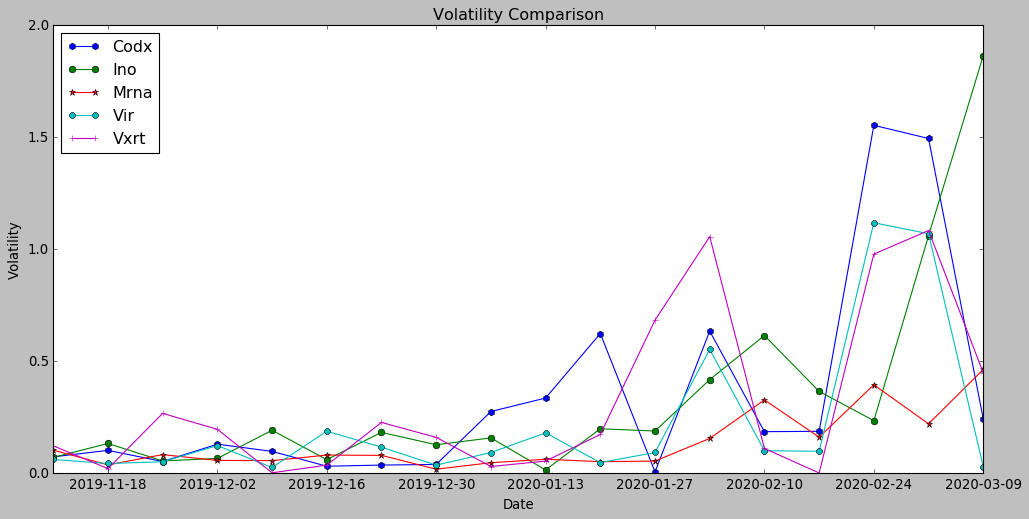

In [44]:

#file.plot(x="Date",y="Volume")
ax = plt.gca()

#plt.legend(loc='upper left', shadow=True, fontsize='x-large')
Codx_df.plot(kind='line',x='Date',y='Volatility',ax=ax,figsize = (15,7),marker='h',label='Codx',x_compat=True)
Ino_df.plot(kind='line',x='Date',y='Volatility',ax=ax,figsize = (15,7),marker='o',label='Ino',x_compat=True)
Mrna_df.plot(kind='line',x='Date',y='Volatility',ax=ax,figsize = (15,7),marker='*',label='Mrna',x_compat=True)
Vir_df.plot(kind='line',x='Date',y='Volatility',ax=ax,figsize = (15,7),marker='8',label='Vir',x_compat=True)
Vxrt_df.plot(kind='line',x='Date',y='Volatility',ax=ax,figsize = (15,7),marker='+',label='Vxrt',x_compat=True)

#datacursor(formatter=formatter, hover=True)
plt.title("Volatility Comparison")
plt.xlabel("Date")
plt.ylabel("Volatility");

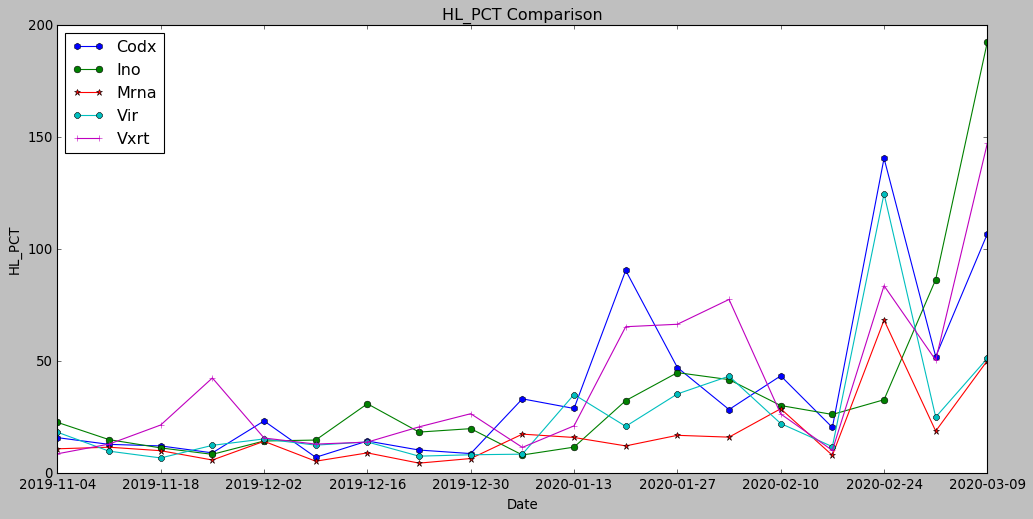

In [45]:
#file.plot(x="Date",y="Volume")
ax = plt.gca()

#plt.legend(loc='upper left', shadow=True, fontsize='x-large')
Codx_df.plot(kind='line',x='Date',y='HL_PCT',ax=ax,figsize = (15,7),marker='h',label='Codx',x_compat=True)
Ino_df.plot(kind='line',x='Date',y='HL_PCT',ax=ax,figsize = (15,7),marker='o',label='Ino',x_compat=True)
Mrna_df.plot(kind='line',x='Date',y='HL_PCT',ax=ax,figsize = (15,7),marker='*',label='Mrna',x_compat=True)
Vir_df.plot(kind='line',x='Date',y='HL_PCT',ax=ax,figsize = (15,7),marker='8',label='Vir',x_compat=True)
Vxrt_df.plot(kind='line',x='Date',y='HL_PCT',ax=ax,figsize = (15,7),marker='+',label='Vxrt',x_compat=True)

#datacursor(formatter=formatter, hover=True)
plt.title("HL_PCT Comparison")
plt.xlabel("Date")
plt.ylabel("HL_PCT");

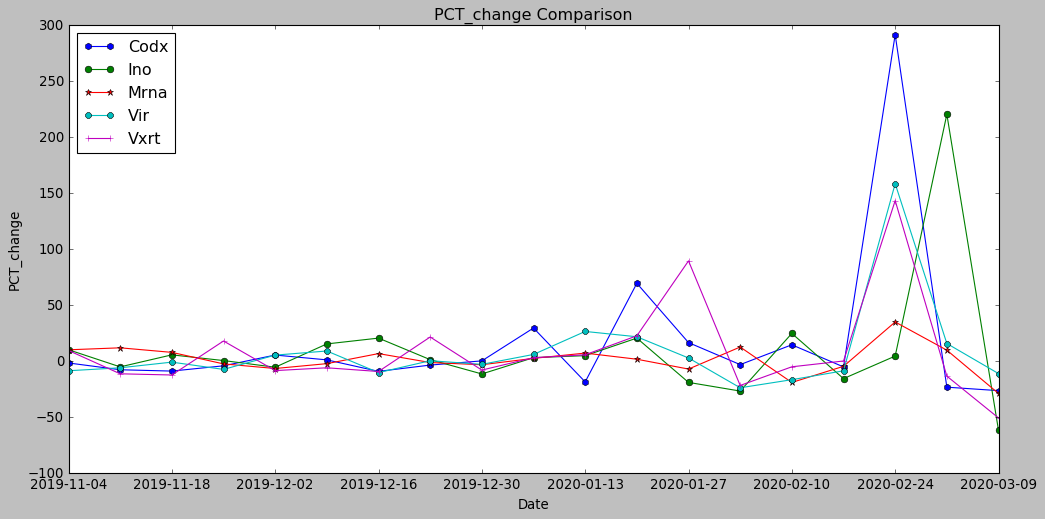

In [46]:

#file.plot(x="Date",y="Volume")

ax = plt.gca()

#plt.legend(loc='upper left', shadow=True, fontsize='x-large')

Codx_df.plot(kind='line',x='Date',y='PCT_change',ax=ax,figsize = (15,7),marker='h',label='Codx',x_compat=True)
Ino_df.plot(kind='line',x='Date',y='PCT_change',ax=ax,figsize = (15,7),marker='o',label='Ino',x_compat=True)
Mrna_df.plot(kind='line',x='Date',y='PCT_change',ax=ax,figsize = (15,7),marker='*',label='Mrna',x_compat=True)
Vir_df.plot(kind='line',x='Date',y='PCT_change',ax=ax,figsize = (15,7),marker='8',label='Vir',x_compat=True)
Vxrt_df.plot(kind='line',x='Date',y='PCT_change',ax=ax,figsize = (15,7),marker='+',label='Vxrt',x_compat=True)

#datacursor(formatter=formatter, hover=True)

plt.title("PCT_change Comparison")
plt.xlabel("Date")
plt.ylabel("PCT_change");